In [207]:
#Question 1
# STEP(1)
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [3]:
# STEP(2) and STEP(3)
users= pd.read_csv(r'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user',sep='|')

In [4]:
users

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


In [5]:
#STEP 4
users.groupby(users['occupation']).aggregate({'age':['mean']})

,age
,mean
occupation,
administrator,38.746835
artist,31.392857
doctor,43.571429
educator,42.010526
engineer,36.388060
entertainment,29.222222
executive,38.718750
healthcare,41.562500


In [6]:
#STEP 5
x = users.groupby(['occupation'])['gender'].count()

In [7]:
Male= users.loc[users['gender']=='M']

In [8]:
y = Male.groupby(['occupation'])['gender'].count()

In [9]:
Ratio= y/x

In [10]:
Ratio_1= Ratio.sort_values(ascending=False)

In [11]:
print(Ratio_1)

occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other            0.657143
marketing        0.615385
writer           0.577778
none             0.555556
administrator    0.544304
artist           0.535714
librarian        0.431373
healthcare       0.312500
homemaker        0.142857
Name: gender, dtype: float64


In [12]:
#STEP 6
users.groupby(['occupation']).aggregate({'age':['min', 'max']})

age    
              min max
occupation           
administrator  21  70
artist         19  48
doctor         28  64
educator       23  63
engineer       22  70
entertainment  15  50
executive      22  69
healthcare     22  62
homemaker      20  50
lawyer         21  53
librarian      23  69
marketing      24  55
none           11  55
other          13  64
programmer     20  63
retired        51  73
salesman       18  66
scientist      23  55
student         7  42
technician     21  55
writer         18  60

In [13]:
#STEP 7
users.groupby(['occupation','gender']).aggregate({'age':['mean']})

age
                           mean
occupation    gender           
administrator F       40.638889
              M       37.162791
artist        F       30.307692
              M       32.333333
doctor        M       43.571429
educator      F       39.115385
              M       43.101449
engineer      F       29.500000
              M       36.600000
entertainment F       31.000000
              M       29.000000
executive     F       44.000000
              M       38.172414
healthcare    F       39.818182
              M       45.400000
homemaker     F       34.166667
              M       23.000000
lawyer        F       39.500000
              M       36.200000
librarian     F       40.000000
              M       40.000000
marketing     F       37.200000
              M       37.875000
none          F       36.500000
              M       18.600000
other         F       35.472222
              M       34.028986
programmer    F       32.166667
              M       33.216667
retired       F       70.000000
              M       62.538462
salesman      F       27.000000
              M       38.555556
scientist     F       28.333333
              M       36.321429
student       F       20.750000
              M       22.669118
technician    F       38.000000
              M       32.961538
writer        F       37.631579
              M       35.346154

In [14]:
#step 8
Total = users.groupby(['occupation'])['gender'].count()
MF=users.groupby(['occupation','gender'])['gender'].count()

In [15]:
Per = (((MF/Total)*100).round(2))
Per

occupation     gender
administrator  F          45.57
               M          54.43
artist         F          46.43
               M          53.57
doctor         M         100.00
educator       F          27.37
               M          72.63
engineer       F           2.99
               M          97.01
entertainment  F          11.11
               M          88.89
executive      F           9.38
               M          90.62
healthcare     F          68.75
               M          31.25
homemaker      F          85.71
               M          14.29
lawyer         F          16.67
               M          83.33
librarian      F          56.86
               M          43.14
marketing      F          38.46
               M          61.54
none           F          44.44
               M          55.56
other          F          34.29
               M          65.71
programmer     F           9.09
               M          90.91
retired        F           7.14
               M  

In [16]:
#Question2
#Step 1
import pandas as pd

In [17]:
#Step 2 and 3
euro12= pd.read_csv(r'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv')

In [18]:
euro12

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


In [19]:
#Step 4
goals_1= euro12["Goals"]

In [20]:
goals_1

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

In [21]:
#Step 5
Ct_Teams= euro12['Team'].count()
Ct_Teams

16

In [22]:
# Step 6
cols = len(euro12.axes[1])
cols

35

In [23]:
#Step 7
discipline = euro12[["Team","Yellow Cards","Red Cards"]]

In [24]:
#Step 8
discipline.sort_values(by=['Red Cards', 'Yellow Cards'],ascending=False)

,Team,Yellow Cards,Red Cards
6,Greece,9,1
9,Poland,7,1
11,Republic of Ireland,6,1
7,Italy,16,0
10,Portugal,12,0
13,Spain,11,0
0,Croatia,9,0
1,Czech Republic,7,0
14,Sweden,7,0
4,France,6,0


In [25]:
#Step 9
discipline.groupby(['Team']).aggregate({'Yellow Cards':['mean']})

,Yellow Cards
,mean
Team,
Croatia,9.0
Czech Republic,7.0
Denmark,4.0
England,5.0
France,6.0
Germany,4.0
Greece,9.0
Italy,16.0


In [26]:
#step 10
Max_Goal= euro12.query('Goals > 6')['Team']
Max_Goal

5     Germany
13      Spain
Name: Team, dtype: object

In [27]:
#step 11
euro12[euro12['Team'].str.startswith('G')]['Team']

5    Germany
6     Greece
Name: Team, dtype: object

In [28]:
#step 12
euro12.iloc[: , 0:7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


In [29]:
#step 13
euro12.iloc[:, :-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


In [30]:
euro12.loc[euro12.Team.isin(['England', 'Italy', 'Russia']),['Team','Shooting Accuracy']]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


In [31]:
#Question 3
#Step 1
import pandas as pd
import numpy as np

In [32]:
#Step 2
Housing= pd.read_csv(r'C:\Users\Kashsih Taneja\Downloads\us-marriages-divorces-1867-2014.csv')

In [33]:
Random_1= np.random.randint(1, 5, size=100)

In [34]:
Series_1= pd.Series(Random_1)

In [35]:
Random_2= np.random.randint(1, 3, size=100)

In [36]:
Series_2= pd.Series(Random_2)

In [37]:
Random_3= np.random.randint(10000, 30001, size=100)

In [38]:
Series_3= pd.Series(Random_1)

In [39]:
# Step 3 and Step 4
Housing_combine = pd.concat([Series_1, Series_2, Series_3], axis=1)
Housing_1 = { 'bedrs': Series_1, 'bathrs': Series_2, 'price_sqr_meter' : Series_3  }
Housing_1_df= pd.DataFrame(Housing_1)


In [40]:
#Step 5
bigcolumn = pd.concat([Series_1, Series_2, Series_3], axis=0)
#The parameter axis=0 for concat(~) is used to perform vertical concatenation, as opposed to horizontal.
bigcolumn = bigcolumn.to_frame()

In [41]:
#Step 6
print(bigcolumn)
# Yes it going until index 99, indexes were copied from the firstly created 3 data series

    0
0   3
1   4
2   3
3   2
4   2
.. ..
95  4
96  2
97  3
98  3
99  4

[300 rows x 1 columns]


In [42]:
# Step 7 
bigcolumn.reset_index(drop=True, inplace=True)
print(bigcolumn)

     0
0    3
1    4
2    3
3    2
4    2
..  ..
295  4
296  2
297  3
298  3
299  4

[300 rows x 1 columns]


In [90]:
#Question4
import pandas as pd

In [92]:
data = pd.read_csv("wind.txt",sep="\s+",parse_dates= {"date" : ["Yr","Mo","Dy"]})

In [93]:
data.head()

,date,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [97]:
data.shape

(6574, 13)

In [98]:
def date_change(x):
    if x.year>2000:
        x = x.replace(year = x.year-100 )
    return x

In [99]:
data["date"] = data["date"].apply( lambda x: date_change(x)  )

In [100]:
data.head()

,date,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [101]:
data['date'] = data['date'].astype('datetime64[ns]')
data.index = data['date']

In [102]:
data.head()

,date,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
date,,,,,,,,,,,,,
1961-01-01,1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [103]:
print(data.index.dtype)

datetime64[ns]


In [104]:
# missing in each location
data.isnull().sum()

date    0
RPT     6
VAL     3
ROS     2
KIL     5
SHA     2
BIR     0
DUB     3
CLA     2
MUL     3
CLO     1
BEL     0
MAL     4
dtype: int64

In [105]:
# non missing
data.shape[0] - data.isnull().sum().sum()

6543

In [106]:
# Mean windspeeds
for col in set(data.columns) - set(["date"])  :
    print(" Location : {} , Windspeed Avg :{} ".format( col ,data[col].mean())  )

 Location : DUB , Windspeed Avg :9.797342870187183 
 Location : CLO , Windspeed Avg :8.70733150768292 
 Location : SHA , Windspeed Avg :10.455833840535579 
 Location : MAL , Windspeed Avg :15.599079147640747 
 Location : ROS , Windspeed Avg :11.660526475958592 
 Location : CLA , Windspeed Avg :8.495053256238585 
 Location : MUL , Windspeed Avg :8.493590016740201 
 Location : VAL , Windspeed Avg :10.644314411809452 
 Location : RPT , Windspeed Avg :12.362987210718657 
 Location : BEL , Windspeed Avg :13.121006997261915 
 Location : KIL , Windspeed Avg :6.306468260009126 
 Location : BIR , Windspeed Avg :7.092254335260125 


In [107]:
loc_stats = pd.DataFrame(columns=[ 'location' ,'min', 'max', 'mean', 'standard_deviation'])

In [108]:
loc_stats['location'] =  list(set(data.columns) - set(["date"]) )

In [109]:
#step 9
for lc in range( loc_stats.shape[0]  ) :
    location = loc_stats.loc[lc]["location"]
    loc_stats.loc[lc]["mean"] = data[location].mean()
    loc_stats.loc[lc]["min"] = data[location].min()
    loc_stats.loc[lc]["max"] = data[location].max()
    loc_stats.loc[lc]["standard_deviation"] = data[location].std()

In [110]:
loc_stats

,location,min,max,mean,standard_deviation
0,DUB,0.0,30.37,9.797343,4.977555
1,CLO,0.04,28.21,8.707332,4.503954
2,SHA,0.13,37.54,10.455834,4.936125
3,MAL,0.67,42.54,15.599079,6.699794
4,ROS,1.5,33.84,11.660526,5.00845
5,CLA,0.0,31.08,8.495053,4.499449
6,MUL,0.0,25.88,8.49359,4.166872
7,VAL,0.21,33.37,10.644314,5.267356
8,RPT,0.67,35.8,12.362987,5.618413
9,BEL,0.13,42.38,13.121007,5.835037


In [111]:
day_stats = pd.DataFrame(columns=[ 'day' ,'min', 'max', 'mean', 'standard_deviation'])

In [112]:
day_stats["day"] = data.index

In [113]:
day_stats.head()

,day,min,max,mean,standard_deviation
0,1961-01-01,NaN,NaN,NaN,NaN
1,1961-01-02,NaN,NaN,NaN,NaN
2,1961-01-03,NaN,NaN,NaN,NaN
3,1961-01-04,NaN,NaN,NaN,NaN
4,1961-01-05,NaN,NaN,NaN,NaN


In [114]:
#step 10
d_s = data.drop(columns=["date"])
for lc in range( day_stats.shape[0]  ) :
    day = day_stats.loc[lc]["day"]
    day_stats.loc[lc,"mean"] = d_s.loc[day].mean()
    day_stats.loc[lc,"min"] = d_s.loc[day].min()
    day_stats.loc[lc,"max"] = d_s.loc[day].max()
    day_stats.loc[lc,"standard_deviation"] = d_s.loc[day].std()

In [115]:
day_stats.head()

,day,min,max,mean,standard_deviation
0,1961-01-01,9.29,18.5,13.018182,2.808875
1,1961-01-02,6.5,17.54,11.336364,3.188994
2,1961-01-03,6.17,18.5,11.641818,3.681912
3,1961-01-04,1.79,11.75,6.619167,3.198126
4,1961-01-05,6.17,13.33,10.63,2.445356


In [212]:
#Step 11
jan_data = data[data.index.month == 1]
jan_data.mean()

RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

In [213]:
#Step 12
Yearly=data.resample('Y').count()
Yearly.index=Yearly.index.to_period('Y')
Yearly

,date,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
date,,,,,,,,,,,,,
1961,365,360,362,363,361,363,365,362,363,362,364,365,362
1962,365,364,365,365,364,365,365,365,365,365,365,365,364
1963,365,365,365,365,365,365,365,365,365,365,365,365,365
1964,366,366,366,366,366,366,366,366,366,366,366,366,366
1965,365,365,365,365,365,365,365,365,365,365,365,365,365
1966,365,365,365,365,365,365,365,365,365,365,365,365,365
1967,365,365,365,365,365,365,365,365,365,365,365,365,365
1968,366,366,366,366,366,366,366,366,366,366,366,366,366
1969,365,365,365,365,365,365,365,365,365,365,365,365,365


In [214]:
#Step 13
Monthly=data.resample('M').count()
Monthly.index=Monthly.index.to_period('M')
Monthly

,date,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
date,,,,,,,,,,,,,
1961-01,31,30,30,31,31,29,31,31,30,31,31,31,31
1961-02,28,28,28,27,27,28,28,28,28,28,28,28,28
1961-03,31,30,31,31,30,31,31,31,31,29,31,31,30
1961-04,30,30,30,30,30,30,30,30,30,30,30,30,30
1961-05,31,31,30,31,30,31,31,30,31,31,31,31,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08,31,31,31,31,31,31,31,31,31,31,31,31,31
1978-09,30,30,30,30,30,30,30,30,30,30,30,30,30
1978-10,31,31,31,31,31,31,31,31,31,31,31,31,31


In [215]:
#Step 14
Weekly=data.resample('7D').count()
Weekly.index=Weekly.index.to_period('7D')
Weekly

,date,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
date,,,,,,,,,,,,,
1961-01-01,7,7,6,7,7,6,7,7,6,7,7,7,7
1961-01-08,7,7,7,7,7,7,7,7,7,7,7,7,7
1961-01-15,7,7,7,7,7,6,7,7,7,7,7,7,7
1961-01-22,7,7,7,7,7,7,7,7,7,7,7,7,7
1961-01-29,7,6,7,7,7,7,7,7,7,7,7,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-03,7,7,7,7,7,7,7,7,7,7,7,7,7
1978-12-10,7,7,7,7,7,7,7,7,7,7,7,7,7
1978-12-17,7,7,7,7,7,7,7,7,7,7,7,7,7


In [216]:
#Step 15
_52week=data.groupby(data.index.to_period('W')).mean().apply(pd.DataFrame.describe, axis=1,)
_52week.iloc[ 1: , :]

,count,mean,std,min,25%,50%,75%,max
date,,,,,,,,
1961-01-02/1961-01-08,12.0,9.847659,2.601705,6.417143,7.979881,9.980714,11.735357,13.541429
1961-01-09/1961-01-15,12.0,8.353214,2.719649,4.630000,6.543214,7.553571,11.049643,12.468571
1961-01-16/1961-01-22,12.0,9.368413,2.224531,6.328571,7.761071,9.111905,10.255714,13.204286
1961-01-23/1961-01-29,12.0,16.958095,2.915635,12.720000,15.077143,15.890714,18.639286,22.530000
1961-01-30/1961-02-05,12.0,11.800357,2.807310,8.247143,9.371786,12.070000,13.524286,16.827143
...,...,...,...,...,...,...,...,...
1978-11-27/1978-12-03,12.0,10.913333,3.557747,5.565714,8.913214,9.929286,12.362143,18.728571
1978-12-04/1978-12-10,12.0,15.938333,3.843412,9.777143,13.596071,14.862143,18.685357,23.061429
1978-12-11/1978-12-17,12.0,11.216786,3.474393,6.917143,8.416071,10.655714,14.766429,16.758571


In [94]:
#Question 5
#Step 1
import pandas as pd

In [95]:
#step 2 and Step 3
chipo = pd.read_csv("chipotle.tsv.txt",sep='\t')

In [96]:
#Step 4
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [46]:
#Step 5
chipo.shape[0]

4622

In [47]:
#step 6
chipo.shape[1]

5

In [48]:
#step 7
print( list(chipo.columns) )

['order_id', 'quantity', 'item_name', 'choice_description', 'item_price']


In [49]:
#step 8
chipo.index

RangeIndex(start=0, stop=4622, step=1)

In [50]:
#step 9
chipo["item_name"].value_counts()[:1]

Chicken Bowl    726
Name: item_name, dtype: int64

In [51]:
# step 10
chipo2 = chipo.groupby('item_name').sum()
chipo2[ chipo2["quantity"] ==   chipo2.quantity.max() ]

,order_id,quantity
item_name,,
Chicken Bowl,713926,761


In [52]:
#step 11
chipo["choice_description"].value_counts()[0]

134

In [53]:
#step 12
chipo["quantity"].sum()

4972

In [54]:
# Step 13
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:-1]))

In [55]:
type(chipo['item_price'][0])

numpy.float64

In [56]:
#step 14
print(" Revenue : $ {} ".format(chipo["item_price"].sum() ) ) 

 Revenue : $ 34500.16 


In [57]:
# Step 15
print(  chipo["order_id"].max()  )

1834


In [58]:
#step 16
chipo3 = chipo.groupby('order_id').sum()
chipo3["item_price"].mean()

18.81142857142869

In [59]:
#step 17
print(  list(chipo["item_name"].unique()) )
print()
print( "{} different items are sold  ".format( len(list(chipo["item_name"].unique())) )  )

['Chips and Fresh Tomato Salsa', 'Izze', 'Nantucket Nectar', 'Chips and Tomatillo-Green Chili Salsa', 'Chicken Bowl', 'Side of Chips', 'Steak Burrito', 'Steak Soft Tacos', 'Chips and Guacamole', 'Chicken Crispy Tacos', 'Chicken Soft Tacos', 'Chicken Burrito', 'Canned Soda', 'Barbacoa Burrito', 'Carnitas Burrito', 'Carnitas Bowl', 'Bottled Water', 'Chips and Tomatillo Green Chili Salsa', 'Barbacoa Bowl', 'Chips', 'Chicken Salad Bowl', 'Steak Bowl', 'Barbacoa Soft Tacos', 'Veggie Burrito', 'Veggie Bowl', 'Steak Crispy Tacos', 'Chips and Tomatillo Red Chili Salsa', 'Barbacoa Crispy Tacos', 'Veggie Salad Bowl', 'Chips and Roasted Chili-Corn Salsa', 'Chips and Roasted Chili Corn Salsa', 'Carnitas Soft Tacos', 'Chicken Salad', 'Canned Soft Drink', 'Steak Salad Bowl', '6 Pack Soft Drink', 'Chips and Tomatillo-Red Chili Salsa', 'Bowl', 'Burrito', 'Crispy Tacos', 'Carnitas Crispy Tacos', 'Steak Salad', 'Chips and Mild Fresh Tomato Salsa', 'Veggie Soft Tacos', 'Carnitas Salad Bowl', 'Barbacoa Sa

In [60]:
#Question 6
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rcParams

In [61]:
Housing= pd.read_csv(r'C:\Users\Kashsih Taneja\Downloads\us-marriages-divorces-1867-2014.csv')

In [62]:
Housing.head(10)

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3
5,1872,378000.0,12000.0,42066000,9.0,0.3
6,1873,386000.0,13000.0,43225000,8.9,0.3
7,1874,385000.0,14000.0,44429000,8.7,0.3
8,1875,409000.0,14000.0,45492000,9.0,0.3
9,1876,405000.0,15000.0,46459000,8.7,0.3


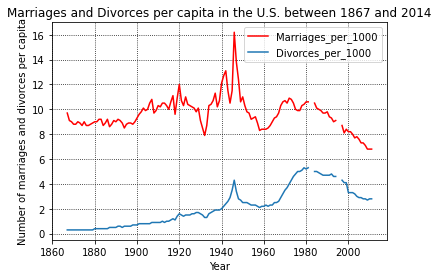

In [63]:
plt.plot(Housing.Year,Housing.Marriages_per_1000,'r')
plt.plot(Housing.Year,Housing.Divorces_per_1000)
plt.title("Marriages and Divorces per capita in the U.S. between 1867 and 2014")
plt.xlabel('Year')
plt.ylabel('Number of marriages and divorces per capita')
plt.grid(True, color = 'k', linestyle = ':')
plt.legend(['Marriages_per_1000','Divorces_per_1000'])

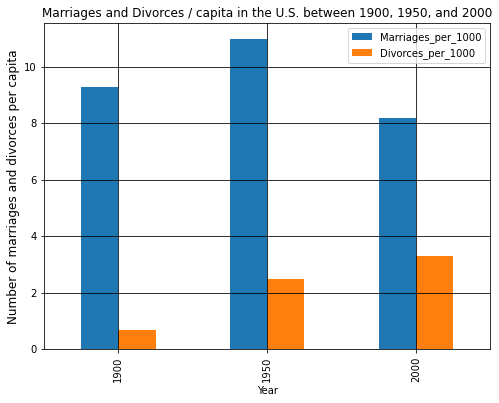

In [88]:
# Question 7
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rcParams
Housing= pd.read_csv(r'C:\Users\Kashsih Taneja\Downloads\us-marriages-divorces-1867-2014.csv')
Housing_Bar= Housing.loc[Housing['Year'].isin([1900, 1950, 2000]) , ['Year','Marriages_per_1000','Divorces_per_1000']]
Housing_Bar.set_index('Year')[['Marriages_per_1000','Divorces_per_1000']].plot(kind='bar',figsize=(8,6))
plt.xlabel('Year', size = 10)
plt.ylabel('Number of marriages and divorces per capita', size = 12)
plt.title('Marriages and Divorces / capita in the U.S. between 1900, 1950, and 2000', size = 12)
plt.grid(True, color = 'k')
plt.show()

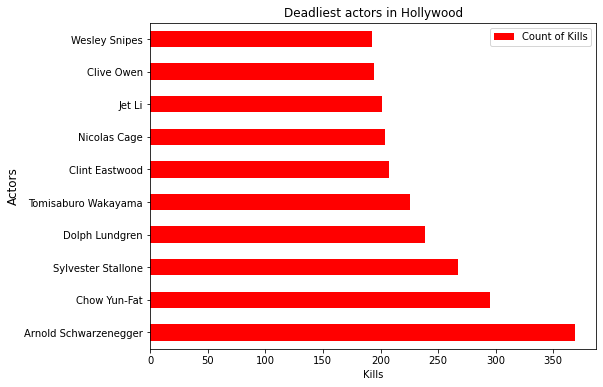

In [89]:
#Question 8
Actor_Kills= pd.read_csv(r'C:\Users\Kashsih Taneja\Downloads\actor_kill_counts.csv')
Actor_Kills_Sort= Actor_Kills.sort_values(by=['Count'],ascending=False)
Actor_Kills_Sort.set_index('Actor')[['Count']].plot(kind='barh',figsize=(8,6),color= 'r')
plt.xlabel('Kills', size = 10)
plt.ylabel('Actors', size = 12)
plt.title('Deadliest actors in Hollywood', size = 12)
plt.legend(['Count of Kills'])

In [142]:
#Question9
import matplotlib.pyplot as plt
Roman_Empires= pd.read_csv(r"C:\Users\Kashsih Taneja\Downloads\roman-emperor-reigns.csv")
Roman_Empires.head(2)

,Emperor,Length_of_Reign,Cause_of_Death
0,Augustus,40.58,Possibly assassinated
1,Tiberius,22.50,Possibly assassinated


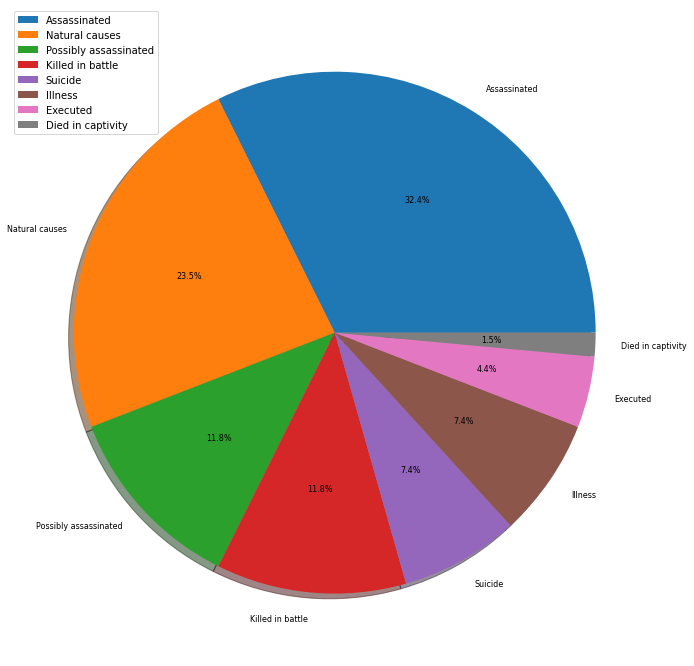

In [198]:
plt.figure(figsize=(15, 12))
plt.pie(x=Roman_Empires.Cause_of_Death.value_counts(), labels =Roman_Empires.Cause_of_Death.value_counts().index,autopct='%1.1f%%',shadow=True,textprops={'fontsize': 8})
plt.axis=('equal')
plt.legend(loc="upper left")
plt.show()

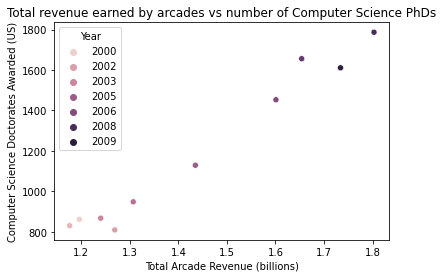

In [211]:
#Question 10
import seaborn as sns
sns.scatterplot('Total Arcade Revenue (billions)', 'Computer Science Doctorates Awarded (US)', data=Arcade, hue='Year')
plt.title("Total revenue earned by arcades vs number of Computer Science PhDs")
plt.show()